# Preparing a toy dataset

This notebook implements the steps taken in the slides, and so, for proper explanations of the steps, I refer to the slides.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
original_data = pd.DataFrame([[1,2,200000,'North','Male',np.nan,3.5,400],
                     [2,5,550000,np.nan,'Female',np.nan,4.0,50],
                     [3,10,980000,'West','Male',14.3,np.nan,10],
                     [4,1,80000,'North','Female',np.nan,5.0,100],
                     [5,15,1600000,'North','Male',np.nan,4.5,10],
                     [6,7,900000,'East','Female',np.nan,4.2,5],
                     [7,20,2100000,'South','Male',10.1,2.5,200]])
original_data.columns = ['SalespersonID', 'YearsInBusiness', 'TotalSales', 'Region', 'Gender', 'AvgDiscount(%)', 'CustomerSatisfaction', 'TrainingHours']
original_data

,SalespersonID,YearsInBusiness,TotalSales,Region,Gender,AvgDiscount(%),CustomerSatisfaction,TrainingHours
0,1,2,200000,North,Male,NaN,3.5,400
1,2,5,550000,NaN,Female,NaN,4.0,50
2,3,10,980000,West,Male,14.3,NaN,10
3,4,1,80000,North,Female,NaN,5.0,100
4,5,15,1600000,North,Male,NaN,4.5,10
5,6,7,900000,East,Female,NaN,4.2,5
6,7,20,2100000,South,Male,10.1,2.5,200


In [5]:
trimmed_data = original_data.drop(labels = ["SalespersonID", "AvgDiscount(%)"], axis = 1)
trimmed_data

,YearsInBusiness,TotalSales,Region,Gender,CustomerSatisfaction,TrainingHours
0,2,200000,North,Male,3.5,400
1,5,550000,NaN,Female,4.0,50
2,10,980000,West,Male,NaN,10
3,1,80000,North,Female,5.0,100
4,15,1600000,North,Male,4.5,10
5,7,900000,East,Female,4.2,5
6,20,2100000,South,Male,2.5,200


In [6]:
#impute Region with mode
imputed_data = trimmed_data.copy()
imputed_data['Region'] = imputed_data['Region'].fillna(imputed_data['Region'].value_counts().index[0])

#impute numerical columns with mean
for col in ['CustomerSatisfaction']:
    imputed_data[col] = imputed_data[col].fillna(imputed_data[col].mean())

imputed_data

,YearsInBusiness,TotalSales,Region,Gender,CustomerSatisfaction,TrainingHours
0,2,200000,North,Male,3.50,400
1,5,550000,North,Female,4.00,50
2,10,980000,West,Male,3.95,10
3,1,80000,North,Female,5.00,100
4,15,1600000,North,Male,4.50,10
5,7,900000,East,Female,4.20,5
6,20,2100000,South,Male,2.50,200


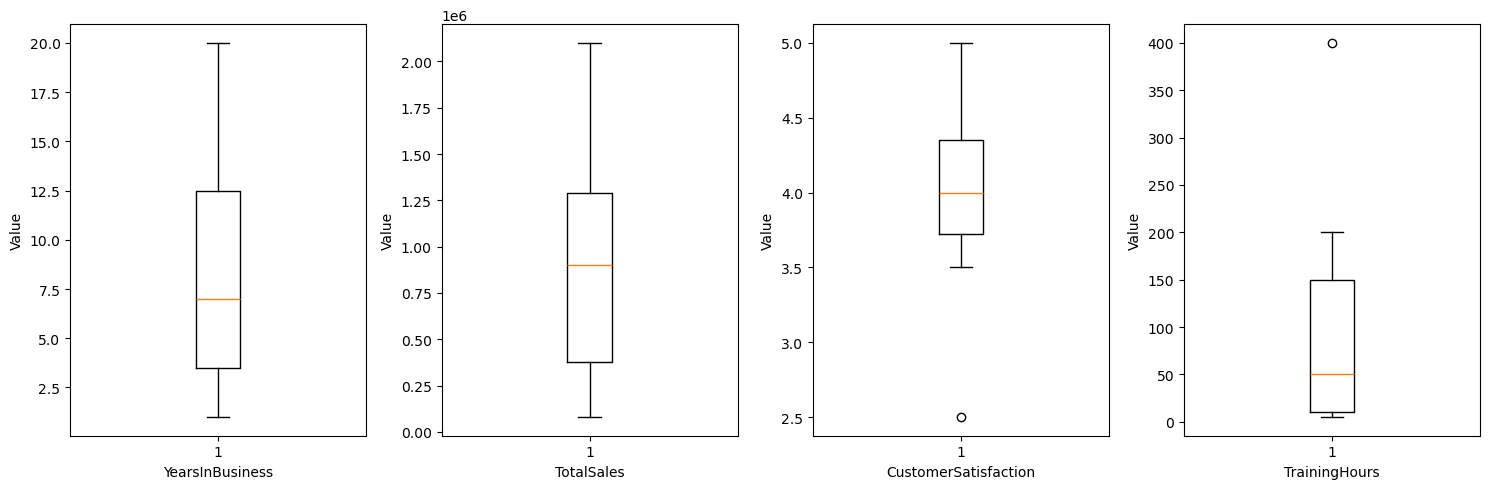

In [7]:
num_features = ['YearsInBusiness', 'TotalSales', 'CustomerSatisfaction', 'TrainingHours']
fig, axes = plt.subplots(1, len(num_features), figsize=(15, 5), sharey=False)
for ax, col in zip(axes, num_features):
    ax.boxplot(imputed_data[col])
    ax.set_xlabel(col)
    ax.set_ylabel('Value')
plt.tight_layout()
plt.show()


In [8]:
transformed_data = imputed_data.copy()
transformed_data['log(TrainingHours)'] = np.log(transformed_data['TrainingHours'])
transformed_data = transformed_data.drop(labels = ["TrainingHours"], axis = 1)
transformed_data

,YearsInBusiness,TotalSales,Region,Gender,CustomerSatisfaction,log(TrainingHours)
0,2,200000,North,Male,3.50,5.991465
1,5,550000,North,Female,4.00,3.912023
2,10,980000,West,Male,3.95,2.302585
3,1,80000,North,Female,5.00,4.605170
4,15,1600000,North,Male,4.50,2.302585
5,7,900000,East,Female,4.20,1.609438
6,20,2100000,South,Male,2.50,5.298317


In [9]:
scaled_data = transformed_data.copy()
scaler = StandardScaler()
columns_to_scale = ['YearsInBusiness', 'TotalSales', 'CustomerSatisfaction', 'log(TrainingHours)']
scaled_data[columns_to_scale] = scaler.fit_transform(scaled_data[columns_to_scale])
scaled_data

,YearsInBusiness,TotalSales,Region,Gender,CustomerSatisfaction,log(TrainingHours)
0,-1.021466,-1.055333,North,Male,-0.612778,1.461689
1,-0.555144,-0.539252,North,Female,0.068086,0.125115
2,0.222058,0.094790,West,Male,0.000000,-0.909361
3,-1.176906,-1.232275,North,Female,1.429815,0.570640
4,0.999260,1.008991,North,Male,0.748951,-0.909361
5,-0.244264,-0.023171,East,Female,0.340432,-1.354886
6,1.776462,1.746250,South,Male,-1.974506,1.016164


In [10]:
encoded_data = scaled_data.copy()
encoded_data['GenderMale'] = pd.get_dummies(encoded_data['Gender'], dtype=float)['Male']
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['Region'], dtype=float)], axis = 1)
encoded_data = encoded_data.drop(labels = ["Gender", "Region"], axis = 1)
encoded_data

,YearsInBusiness,TotalSales,CustomerSatisfaction,log(TrainingHours),GenderMale,East,North,South,West
0,-1.021466,-1.055333,-0.612778,1.461689,1.0,0.0,1.0,0.0,0.0
1,-0.555144,-0.539252,0.068086,0.125115,0.0,0.0,1.0,0.0,0.0
2,0.222058,0.094790,0.000000,-0.909361,1.0,0.0,0.0,0.0,1.0
3,-1.176906,-1.232275,1.429815,0.570640,0.0,0.0,1.0,0.0,0.0
4,0.999260,1.008991,0.748951,-0.909361,1.0,0.0,1.0,0.0,0.0
5,-0.244264,-0.023171,0.340432,-1.354886,0.0,1.0,0.0,0.0,0.0
6,1.776462,1.746250,-1.974506,1.016164,1.0,0.0,0.0,1.0,0.0


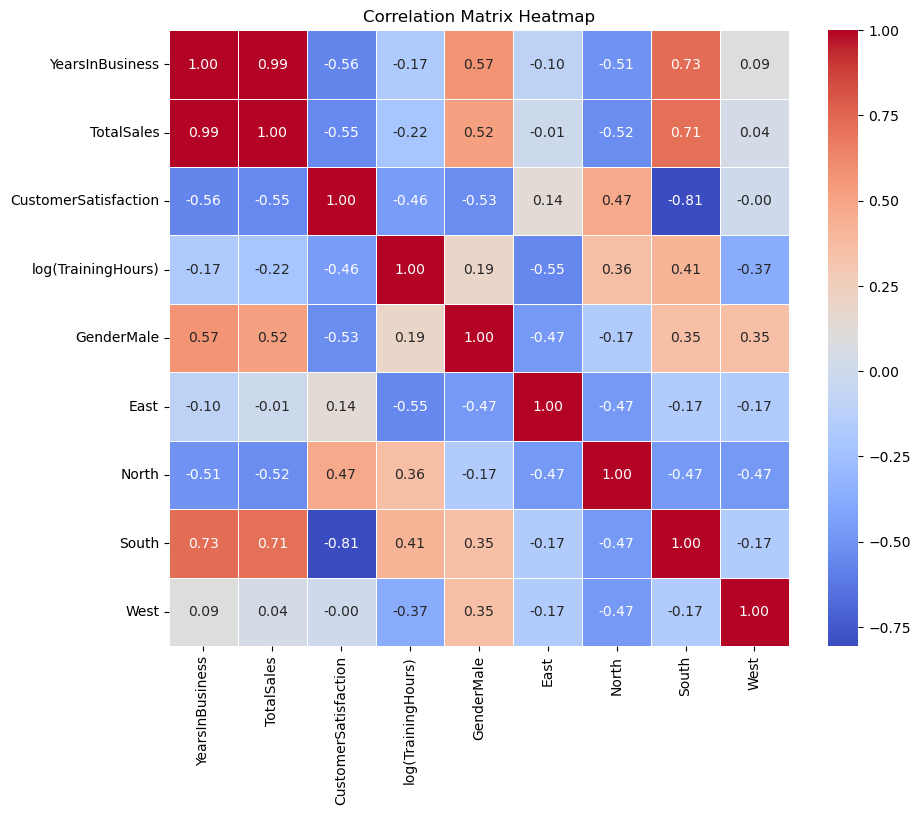

In [11]:
corr_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
engineered_data = encoded_data.copy()
engineered_data['Sales/Years'] = transformed_data['TotalSales']/transformed_data['YearsInBusiness'] #before scaling
scaler = StandardScaler()
engineered_data['Sales/Years'] = scaler.fit_transform(engineered_data[['Sales/Years']])
engineered_data = engineered_data.drop(labels = ["TotalSales"], axis = 1)
engineered_data

,YearsInBusiness,CustomerSatisfaction,log(TrainingHours),GenderMale,East,North,South,West,Sales/Years
0,-1.021466,-0.612778,1.461689,1.0,0.0,1.0,0.0,0.0,-0.298803
1,-0.555144,0.068086,0.125115,0.0,0.0,1.0,0.0,0.0,0.441906
2,0.222058,0.000000,-0.909361,1.0,0.0,0.0,0.0,1.0,-0.446945
3,-1.176906,1.429815,0.570640,0.0,0.0,1.0,0.0,0.0,-1.780222
4,0.999260,0.748951,-0.909361,1.0,0.0,1.0,0.0,0.0,0.195003
5,-0.244264,0.340432,-1.354886,0.0,1.0,0.0,0.0,0.0,1.817509
6,1.776462,-1.974506,1.016164,1.0,0.0,0.0,1.0,0.0,0.071552


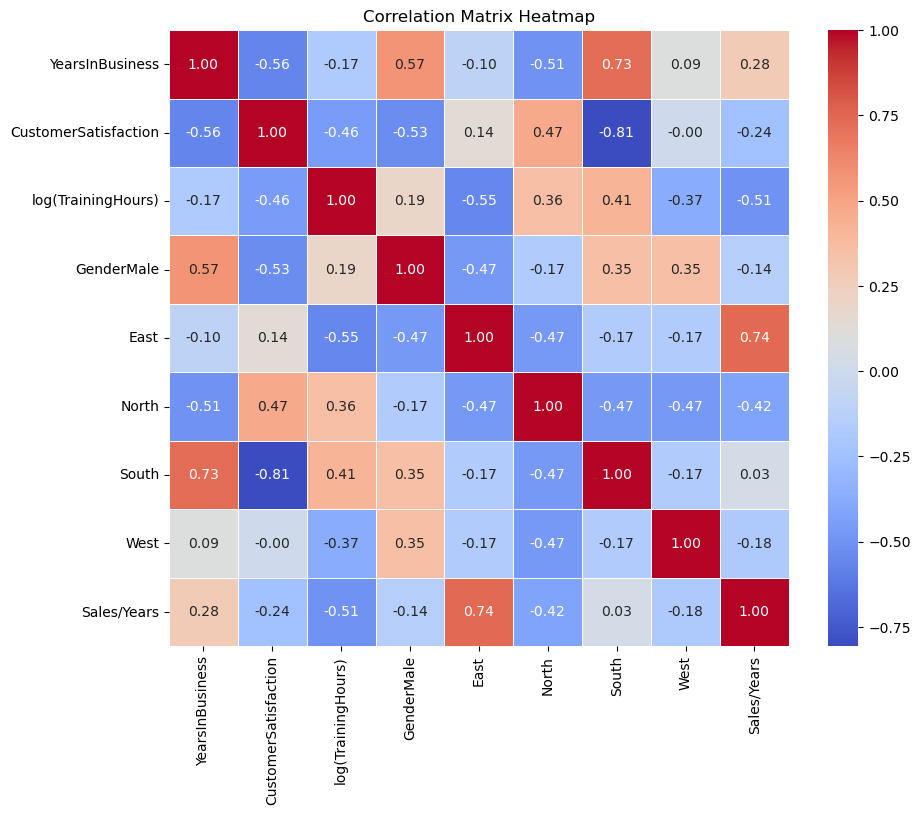

In [13]:
corr_matrix = engineered_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()